In [1]:
#from time import time

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from my_fun import read_feature
from my_fun import run_model
from my_fun import summary_result
from my_fun import plot_result_mergecv

brain_feature_list, subject_info_merge = read_feature()

result_dir = 'result/PTSD2/'

# remove samples with Med_rating higher than 1:
# subject_info_merge = subject_info_merge.loc[subject_info_merge["Med_Rating"]<2]
    
# subject_info_merge.to_csv("subject_info_merge.csv", sep = ",")


(165, 4)
(8719, 6)
cat_vbm:
(856, 143)
label fa:
(856, 50)
tract fa:
(856, 20)
tract md:
(856, 20)
label md:
(856, 50)
alff
(856, 246)
falff
(856, 246)
reho
(856, 246)


In [2]:
print("participants:")
print("number of subjects: %d" % subject_info_merge.shape[0])
print("meam  and std of age: %.2f %.2f" % (subject_info_merge["age_at_cnb"].mean(),\
                                           subject_info_merge["age_at_cnb"].std()))
print("range of age: %d - %d" % (subject_info_merge["age_at_cnb"].max(),\
                                 subject_info_merge["age_at_cnb"].min()))

print("number of females: %d" % subject_info_merge.loc[subject_info_merge['Sex_x']==0,:].shape[0])
print("number of males: %d" % subject_info_merge.loc[subject_info_merge['Sex_x']==1,:].shape[0])



participants:
number of subjects: 839
meam  and std of age: 14.37 3.37
range of age: 21 - 8
number of females: 451
number of males: 388


In [3]:
from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

subject_info_hc = subject_info_merge.loc[subject_info_merge["ptsd"]==0]
subject_info_ptsd = subject_info_merge.loc[subject_info_merge["ptsd"]==2]
subject_info_trauma = subject_info_merge.loc[subject_info_merge["ptsd"]==1]

# count number of subjects in each group: (with brain imaging data:)
print(len(subject_info_hc.index))
print(len(subject_info_ptsd.index))
print(len(subject_info_trauma.index))

# tune model in 3-fold CV:
# n fold CV on hc data:
nfold = 10
seed = 111
kf = KFold(n_splits=nfold, shuffle = True, random_state=seed)
# kf = StratifiedKFold(n_splits=nfold, shuffle = True, random_state=seed)


60
70
35


In [4]:
###############################################ridge:#########################################
from sklearn.linear_model import RidgeCV
import numpy as np

# ridge regression:
alpha = np.power(10, np.linspace(-3, 3, num = 10))
# print(alpha)
ridge_cv = RidgeCV(alphas=alpha, cv = nfold)

result_table_ridge, scatter_data_ridge = run_model(ridge_cv, subject_info_hc, brain_feature_list, 
                                                   kf, fit_method = 0)


processing on: %s -------------------------- GMV
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 7
run_model on CV: 8


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- ReHo
run_model on CV: 1
run_model on CV: 2


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


processing on: %s -------------------------- ALFF
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- FA
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


processing on: %s -------------------------- MD
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- GMV&DTI
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


processing on: %s -------------------------- GMV&rsfMRI
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 5
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- DTI&rsfMRI
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- Multi-modal
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10


In [5]:
result_table_ridge.to_csv(result_dir + "result_table_ridge.csv", sep = ",")
scatter_data_ridge.to_csv(result_dir + "scatter_data_ridge.csv", sep = ",", index = False)


In [6]:
import pandas as pd
result_table = pd.read_csv("result/PTSD/result_table_ridge.csv", sep = ",", header = [0,1], index_col = 0)
# result_table.columns = col_result_table
print(result_table)
result_summary_ridge, result_plot_ridge = summary_result(result_table)

            Pearson r                                                    \
                boot1     boot2     boot3     boot4     boot5     boot6   
GMV          0.944865  0.669376  0.531912  0.708000  0.661763  0.748217   
ReHo         0.947149  0.529967  0.738931  0.813377  0.825887  0.598148   
ALFF         0.804818  0.148632  0.631522 -0.270542  0.716180  0.597635   
FA           0.480071  0.918675  0.146520  0.577802  0.635849  0.841419   
MD           0.961431  0.757610 -0.467060  0.274145  0.972251  0.869173   
GMV&DTI      0.919094  0.857180  0.004508  0.776214  0.845755  0.958678   
GMV&rsfMRI   0.960789  0.436703  0.688952  0.882305  0.613772  0.808100   
DTI&rsfMRI   0.909735  0.837025  0.493334  0.725453  0.903211  0.786528   
Multi-modal  0.963184  0.810350  0.437509  0.904556  0.849481  0.854393   

                                                       ...         rmse  \
                boot7     boot8     boot9    boot10    ...        boot1   
GMV          0.673754  0

<Figure size 1080x1080 with 0 Axes>

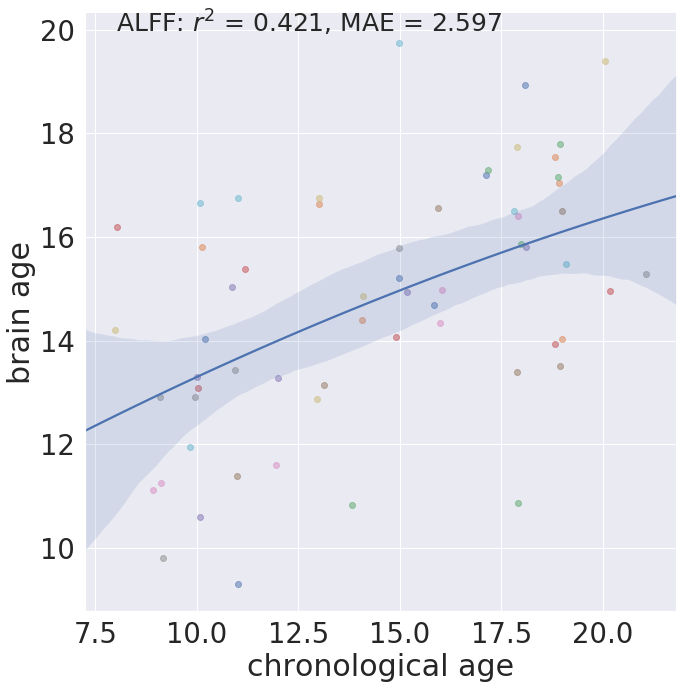

<Figure size 1080x1080 with 0 Axes>

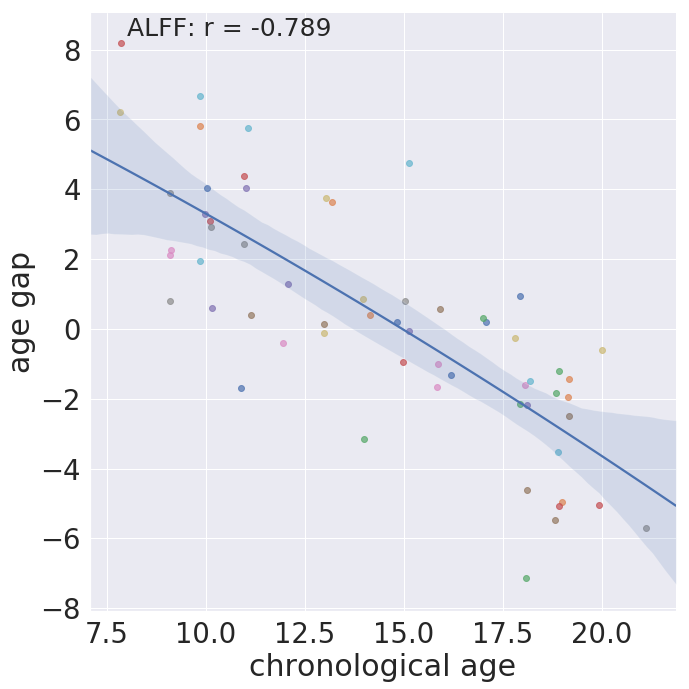

<Figure size 1080x1080 with 0 Axes>

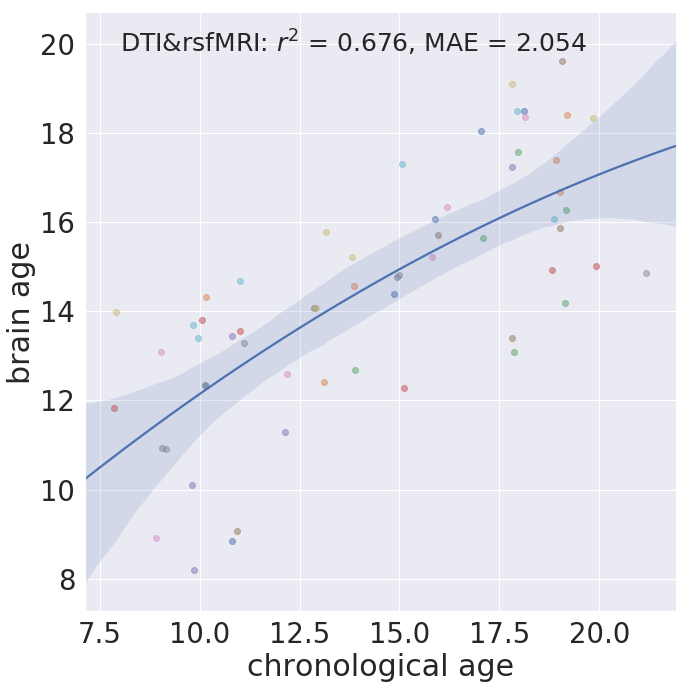

<Figure size 1080x1080 with 0 Axes>

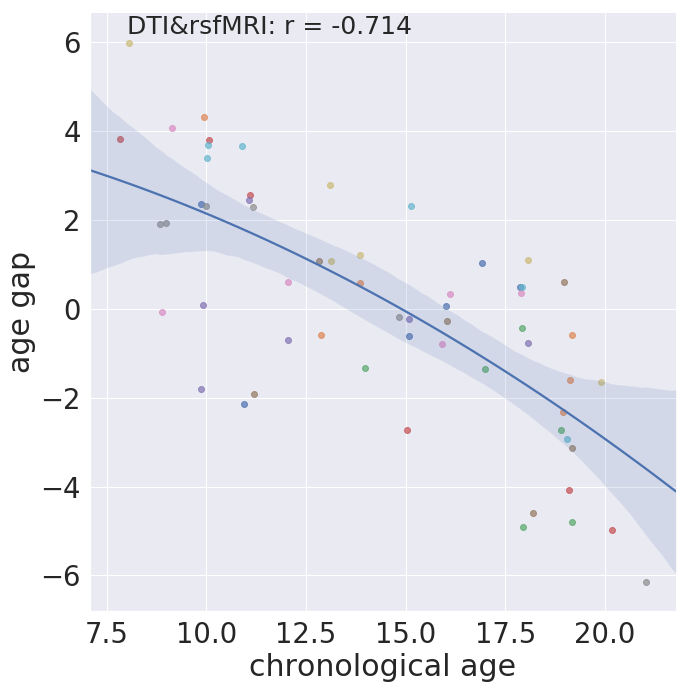

<Figure size 1080x1080 with 0 Axes>

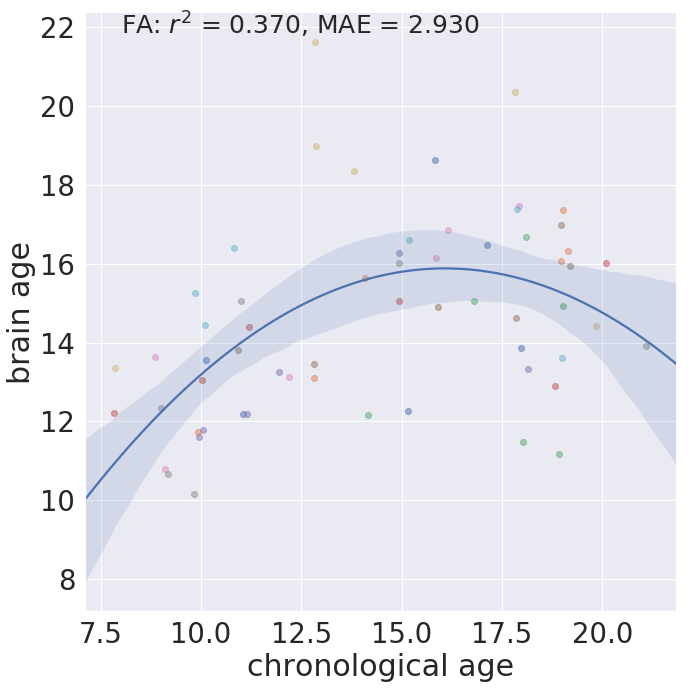

<Figure size 1080x1080 with 0 Axes>

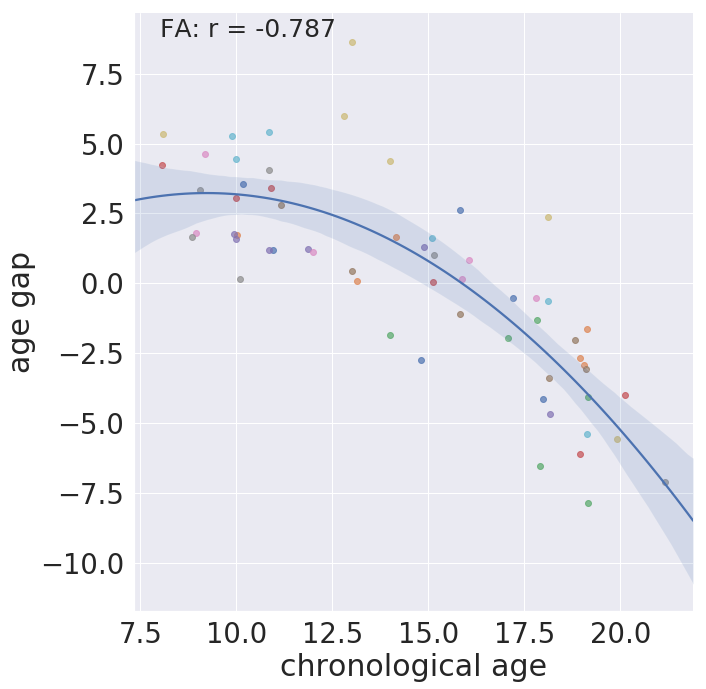

<Figure size 1080x1080 with 0 Axes>

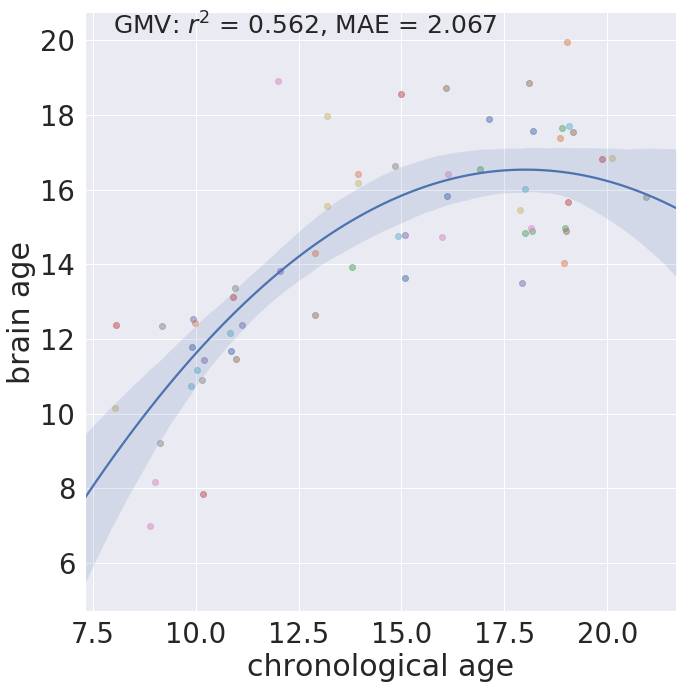

<Figure size 1080x1080 with 0 Axes>

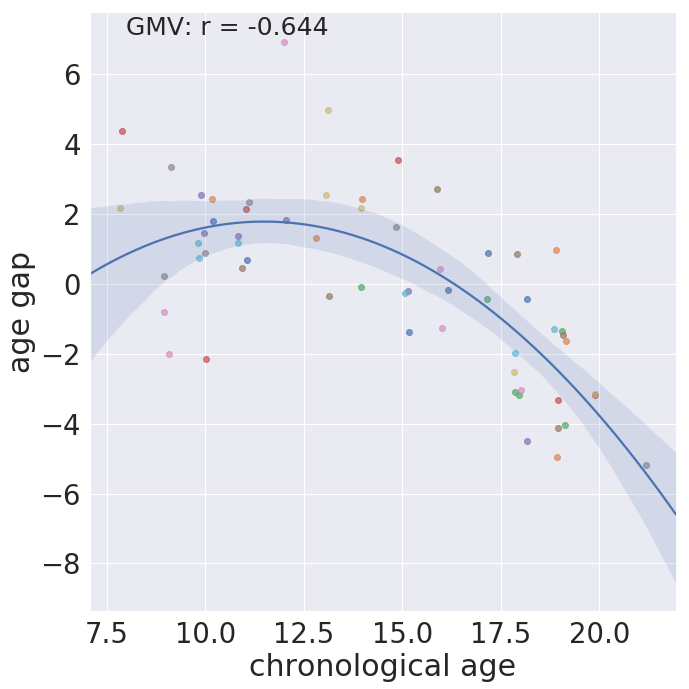

<Figure size 1080x1080 with 0 Axes>

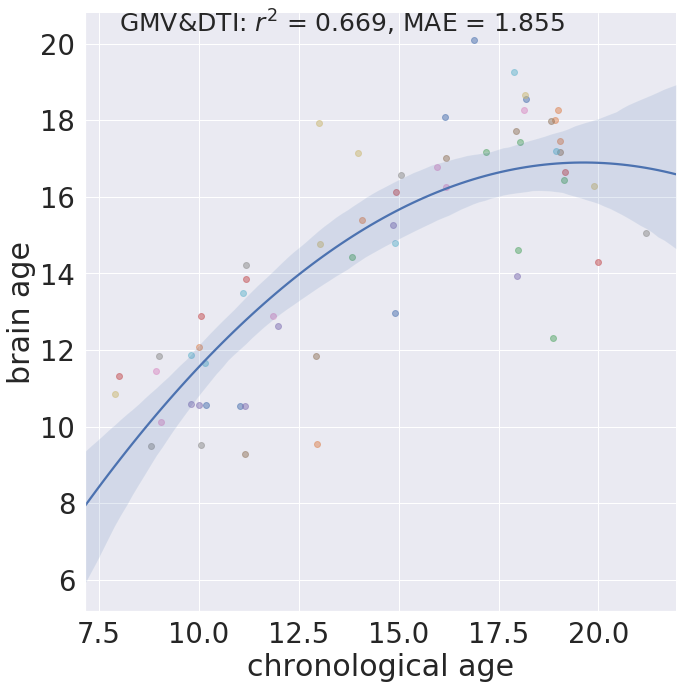

<Figure size 1080x1080 with 0 Axes>

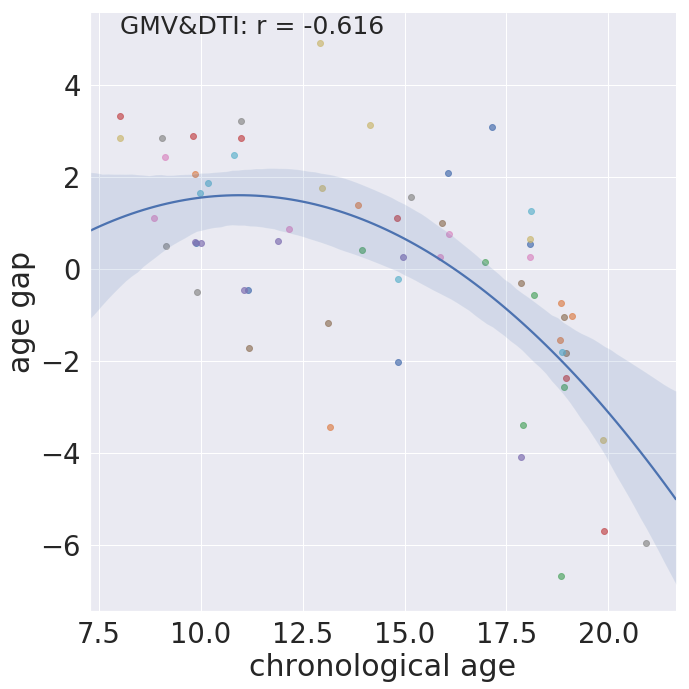

<Figure size 1080x1080 with 0 Axes>

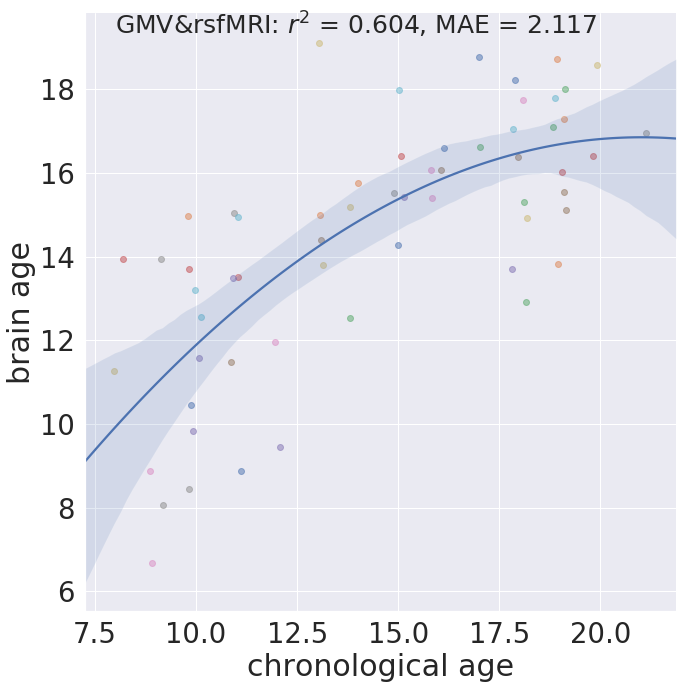

<Figure size 1080x1080 with 0 Axes>

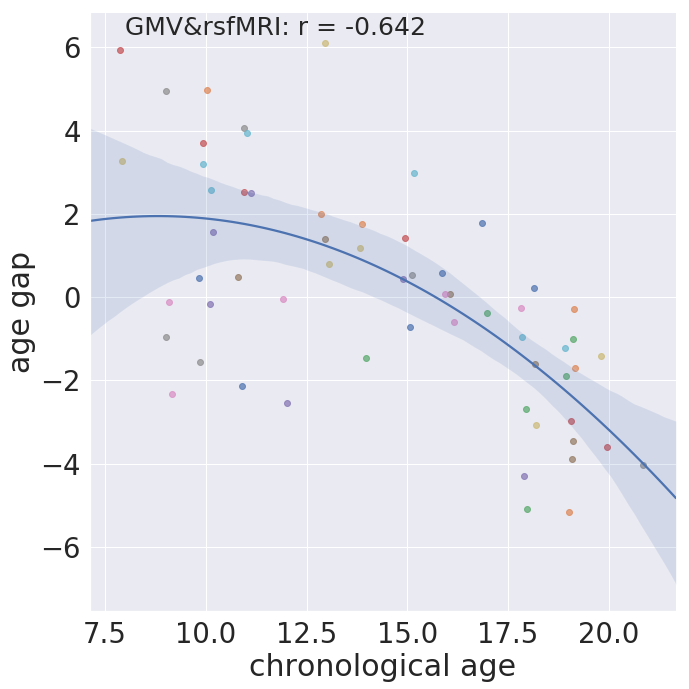

<Figure size 1080x1080 with 0 Axes>

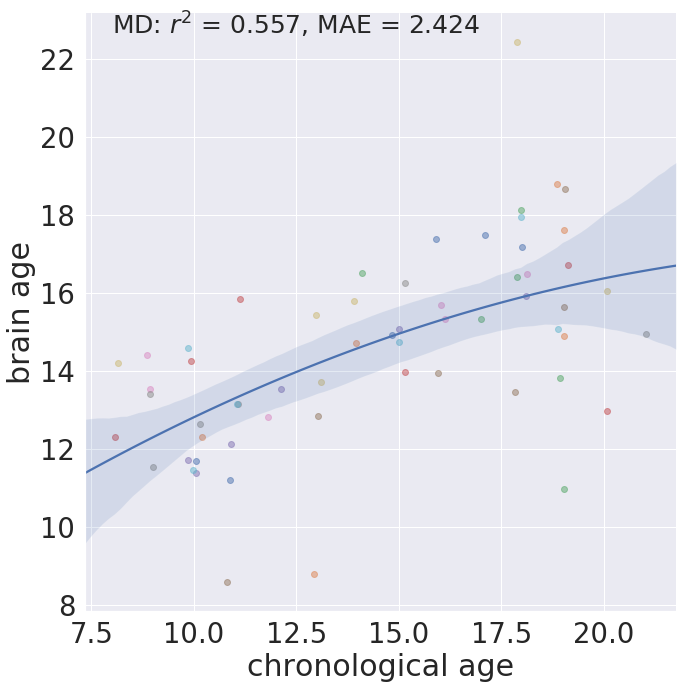

<Figure size 1080x1080 with 0 Axes>

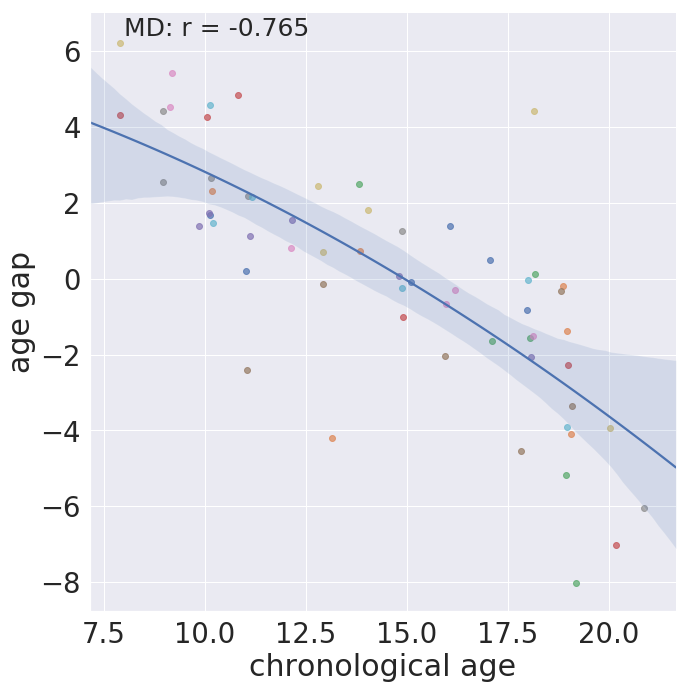

<Figure size 1080x1080 with 0 Axes>

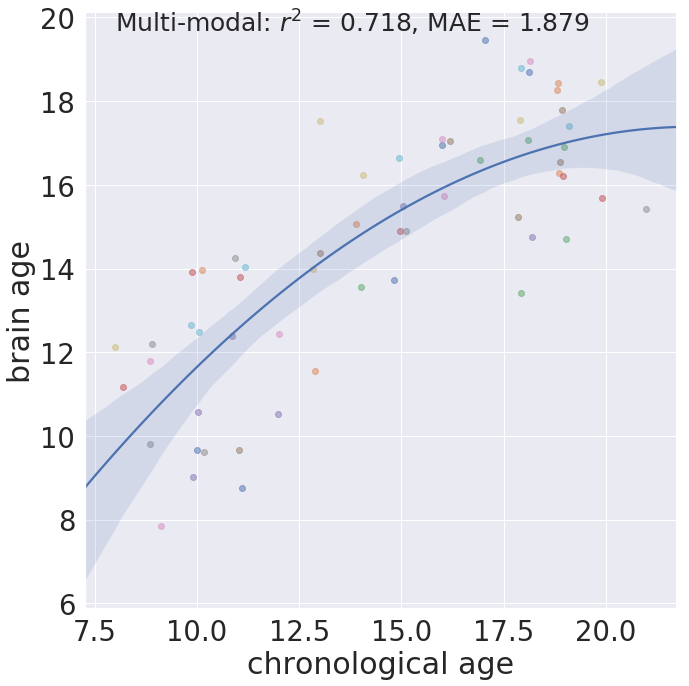

<Figure size 1080x1080 with 0 Axes>

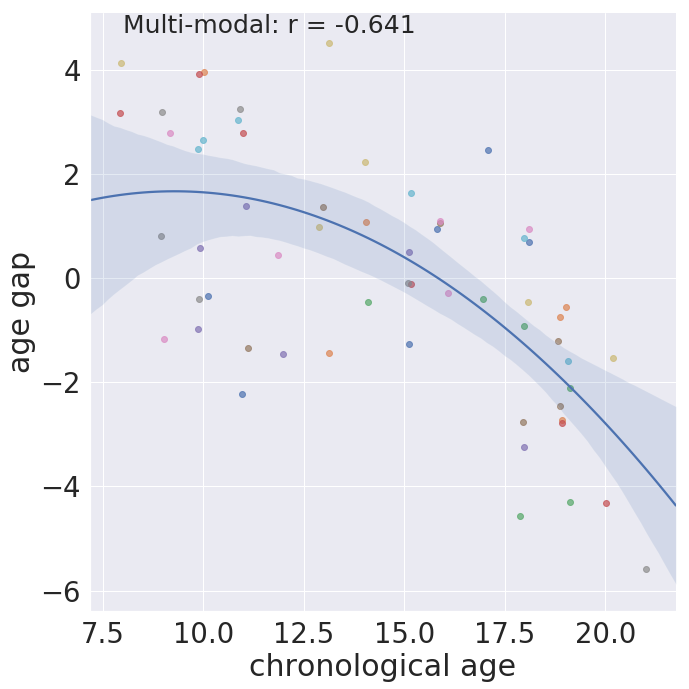

<Figure size 1080x1080 with 0 Axes>

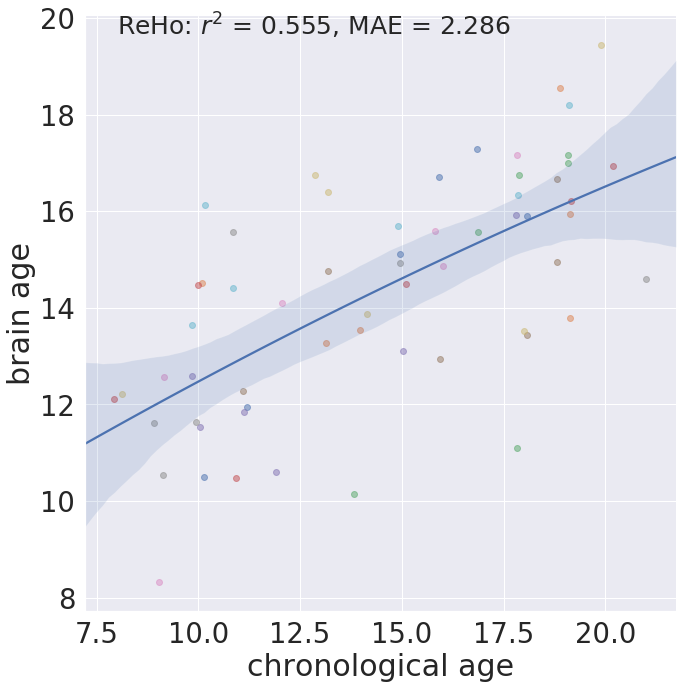

<Figure size 1080x1080 with 0 Axes>

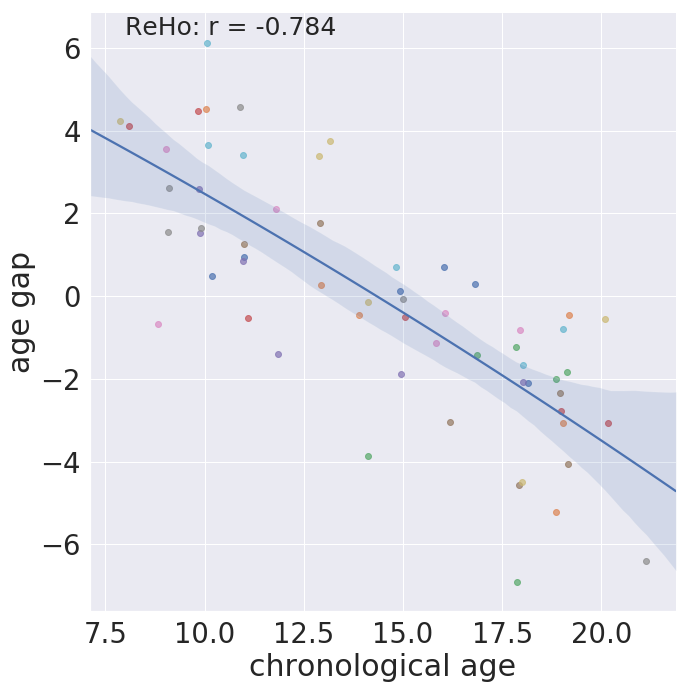

In [7]:
# plot ridge regression results:
# to make the plot show up if codes are called in a function.
%matplotlib inline

scatter_data = pd.read_csv(result_dir + "scatter_data_ridge.csv", sep = ",", header = 0, )
plot_result_mergecv(result_summary_ridge, scatter_data)

In [8]:
############################################### SVR: #########################################
from sklearn.svm import SVR
import numpy as np

C = np.power(10, np.linspace(-1,2, num = 20))
epsilon=np.linspace(.001, 1, num = 20)

param_grid_svr = dict(C = C, epsilon = epsilon)
# linear model takes very long time to run.
#grid_svr = GridSearchCV(estimator=SVR(kernel='linear'), param_grid=param_grid_svr, n_jobs=3, refit = True)
# use default kernel rbf:
grid_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr, n_jobs=3, refit = True)

result_table_svr, scatter_data_svr = run_model(grid_svr, subject_info_hc, brain_feature_list, kf, fit_method = 1)



processing on: %s -------------------------- GMV
run_model on CV: 1
Best: 0.541347 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.513191 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 3
Best: 0.512073 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.518936 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.529511 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 6
Best: 0.460314 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 7
Best: 0.496104 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 8
Best: 0.444220 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 9
Best: 0.518972 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 10
Best: 0.492231 using {'C': 16.23776739188721, 'epsilon': 0.001}
processing on: %s -------------------------- ReHo
run_model on CV: 1


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.175376 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 2


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.282360 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 3


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.160076 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.058537 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.080974 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 6
Best: 0.111081 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 7


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.190095 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 8
Best: 0.149371 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 9
Best: 0.168520 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.279410 using {'C': 16.23776739188721, 'epsilon': 0.001}
processing on: %s -------------------------- ALFF
run_model on CV: 1


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.209813 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.350816 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 3


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.168443 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.319974 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.213760 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.185317 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 7


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.212575 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 8


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.211470 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 9


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.307038 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 10
Best: 0.365136 using {'C': 16.23776739188721, 'epsilon': 0.001}
processing on: %s -------------------------- FA
run_model on CV: 1


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.188297 using {'C': 7.847599703514611, 'epsilon': 0.26389473684210524}
run_model on CV: 2
Best: 0.262744 using {'C': 23.357214690901213, 'epsilon': 0.001}
run_model on CV: 3
Best: 0.248219 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 4


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.203998 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.166833 using {'C': 7.847599703514611, 'epsilon': 0.1061578947368421}
run_model on CV: 6
Best: 0.082496 using {'C': 23.357214690901213, 'epsilon': 0.001}
run_model on CV: 7
Best: 0.224953 using {'C': 23.357214690901213, 'epsilon': 0.2113157894736842}
run_model on CV: 8
Best: 0.137763 using {'C': 3.79269019073225, 'epsilon': 0.26389473684210524}
run_model on CV: 9
Best: 0.246242 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 10
Best: 0.263937 using {'C': 7.847599703514611, 'epsilon': 0.3164736842105263}
processing on: %s -------------------------- MD
run_model on CV: 1
Best: 0.353085 using {'C': 2.636650898730358, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.290843 using {'C': 1.8329807108324356, 'epsilon': 0.001}
run_model on CV: 3
Best: 0.402692 using {'C': 2.636650898730358, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.429648 using {'C': 3.79269019073225, 'epsilon': 0.001}
run

/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.290653 using {'C': 2.636650898730358, 'epsilon': 0.001}
run_model on CV: 6
Best: 0.332610 using {'C': 3.79269019073225, 'epsilon': 0.001}
run_model on CV: 7
Best: 0.344978 using {'C': 2.636650898730358, 'epsilon': 0.001}
run_model on CV: 8
Best: 0.372375 using {'C': 2.636650898730358, 'epsilon': 0.001}
run_model on CV: 9
Best: 0.350603 using {'C': 1.8329807108324356, 'epsilon': 0.2113157894736842}
run_model on CV: 10
Best: 0.262414 using {'C': 1.8329807108324356, 'epsilon': 0.2113157894736842}
processing on: %s -------------------------- GMV&DTI
run_model on CV: 1
Best: 0.553822 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.569753 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 3
Best: 0.591893 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.581594 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.528420 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.494740 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 7
Best: 0.526770 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 8
Best: 0.507562 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 9
Best: 0.566927 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.539319 using {'C': 7.847599703514611, 'epsilon': 0.001}
processing on: %s -------------------------- GMV&rsfMRI
run_model on CV: 1
Best: 0.392155 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.526948 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 3


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.402091 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.452087 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.381871 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.330766 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 7
Best: 0.387626 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 8
Best: 0.333397 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 9
Best: 0.414149 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 10
Best: 0.431009 using {'C': 11.288378916846883, 'epsilon': 0.001}
processing on: %s -------------------------- DTI&rsfMRI
run_model on CV: 1
Best: 0.376354 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.437933 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 3
Best: 0.384101 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.417826 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 5


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.327143 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 6
Best: 0.305278 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 7
Best: 0.366523 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 8
Best: 0.364247 using {'C': 5.455594781168517, 'epsilon': 0.001}
run_model on CV: 9
Best: 0.406503 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 10
Best: 0.440600 using {'C': 16.23776739188721, 'epsilon': 0.001}
processing on: %s -------------------------- Multi-modal
run_model on CV: 1
Best: 0.488187 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.579538 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 3
Best: 0.529084 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.549397 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.469759 using {'C': 11.288378916846883, 'epsilon': 0.001}
run_model on CV: 6
Best: 0.432590 using {'

/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.528635 using {'C': 11.288378916846883, 'epsilon': 0.001}


In [9]:
result_table_svr.to_csv(result_dir + "result_table_svr.csv", sep = ",")
scatter_data_svr.to_csv(result_dir + "scatter_data_svr.csv", sep = ",", index = False)

In [10]:
import pandas as pd

result_table = pd.read_csv(result_dir + "result_table_svr.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_svr, result_plot_svr = summary_result(result_table)

#print(plot_data)

summary_result:
            Pearson r            R square                 MAE            \
                 mean       std      mean       std      mean       std   
GMV          0.733855  0.187805  0.570287  0.251483  2.045092  0.672585   
ReHo         0.597525  0.327453  0.453539  0.349289  2.835450  0.629146   
ALFF         0.619092  0.225832  0.429175  0.262420  2.634916  0.817389   
FA           0.512828  0.223353  0.307891  0.239364  2.944454  0.765723   
MD           0.650710  0.488902  0.638546  0.275519  2.320561  0.992707   
GMV&DTI      0.721700  0.397319  0.662927  0.244690  1.903009  0.827419   
GMV&rsfMRI   0.748290  0.302237  0.642151  0.294485  2.282959  0.772066   
DTI&rsfMRI   0.771845  0.194970  0.629957  0.240041  2.345293  0.814646   
Multi-modal  0.813824  0.210659  0.702249  0.279785  2.035386  0.733164   

                 rmse            
                 mean       std  
GMV          2.367401  0.689800  
ReHo         3.200496  0.700173  
ALFF         3.080846 

<Figure size 1080x1080 with 0 Axes>

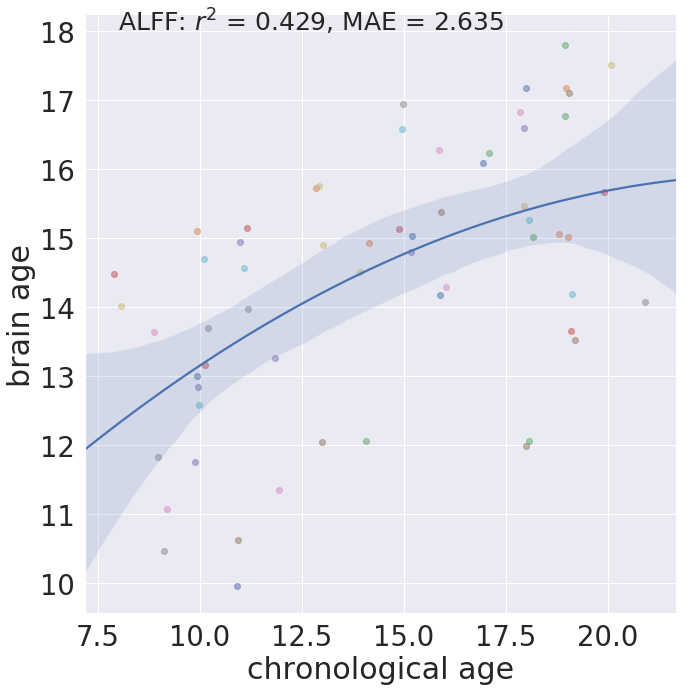

<Figure size 1080x1080 with 0 Axes>

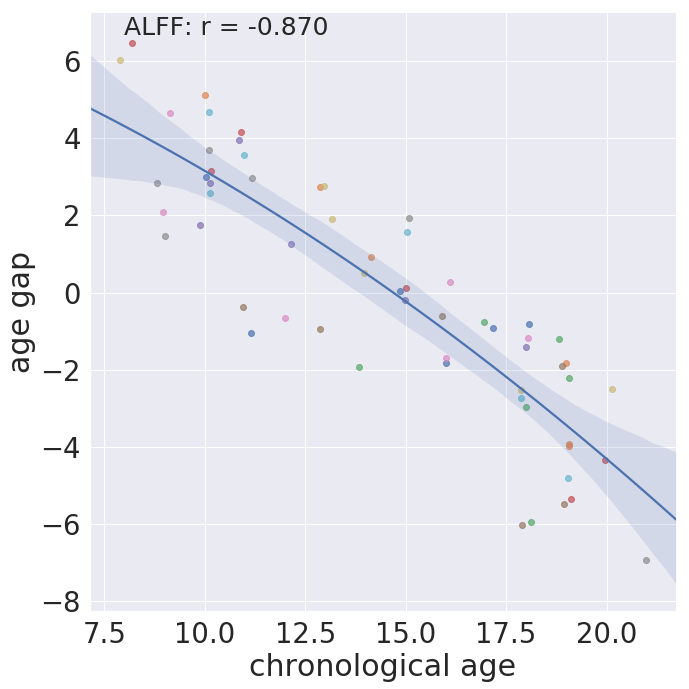

<Figure size 1080x1080 with 0 Axes>

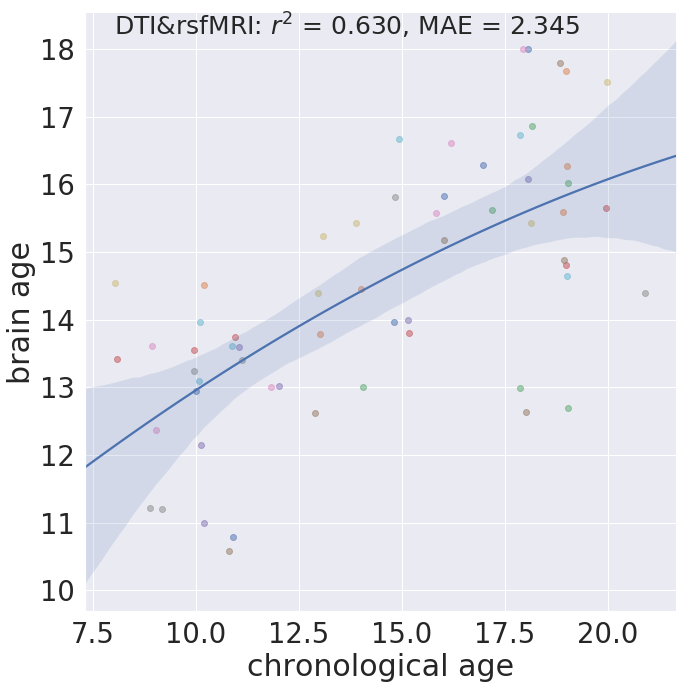

<Figure size 1080x1080 with 0 Axes>

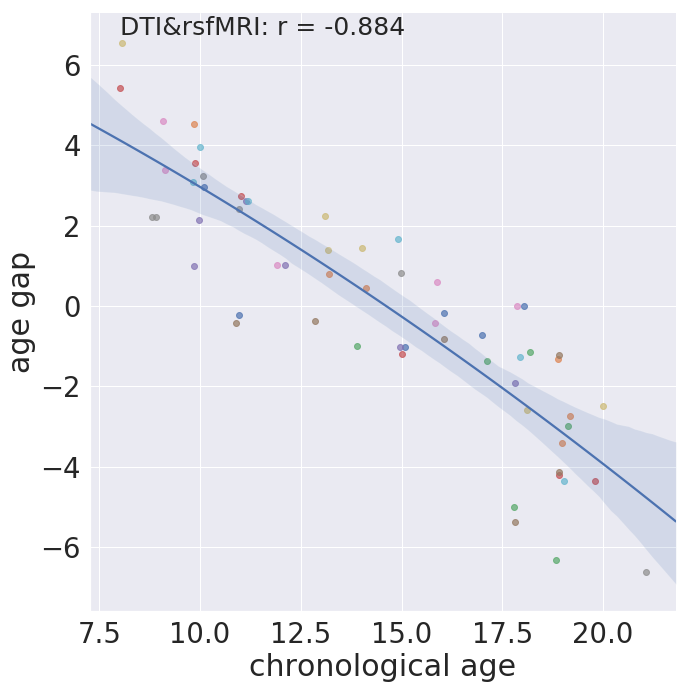

<Figure size 1080x1080 with 0 Axes>

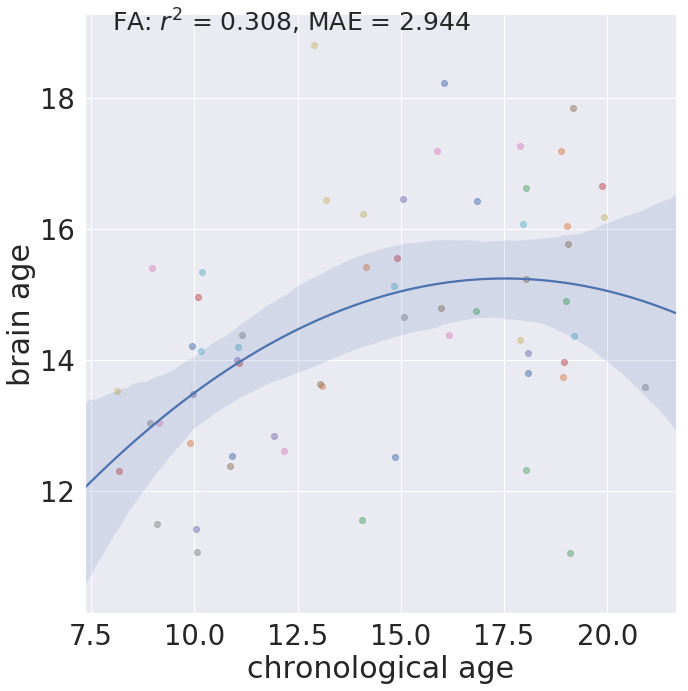

<Figure size 1080x1080 with 0 Axes>

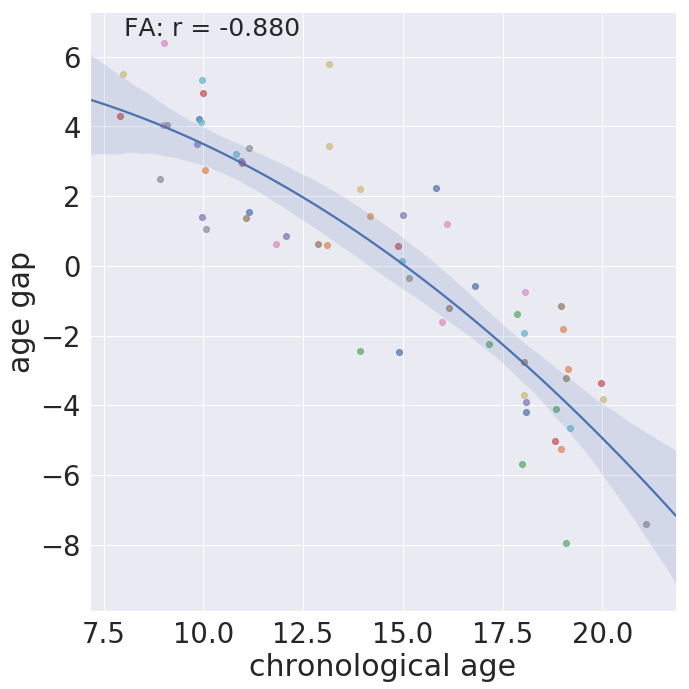

<Figure size 1080x1080 with 0 Axes>

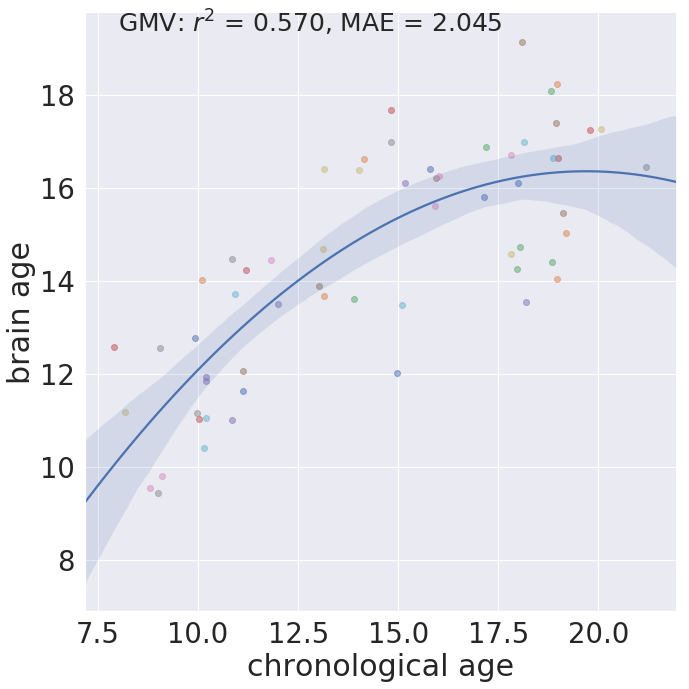

<Figure size 1080x1080 with 0 Axes>

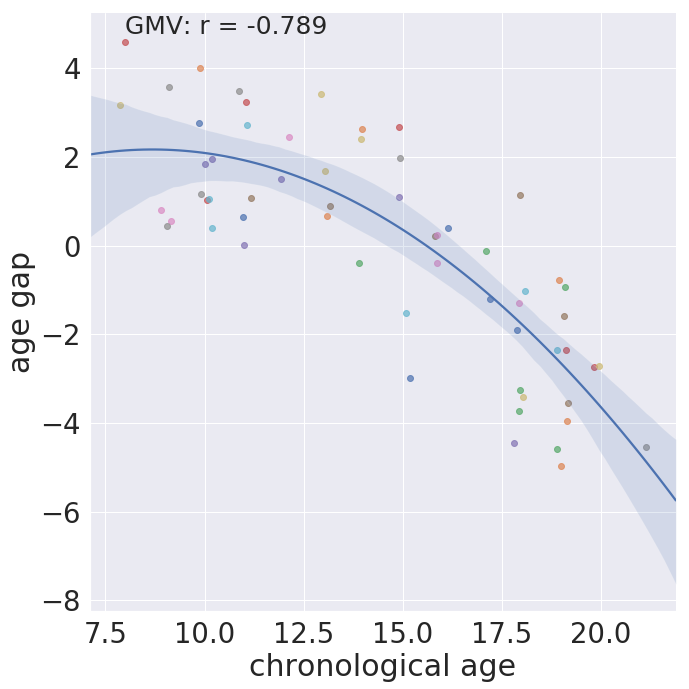

<Figure size 1080x1080 with 0 Axes>

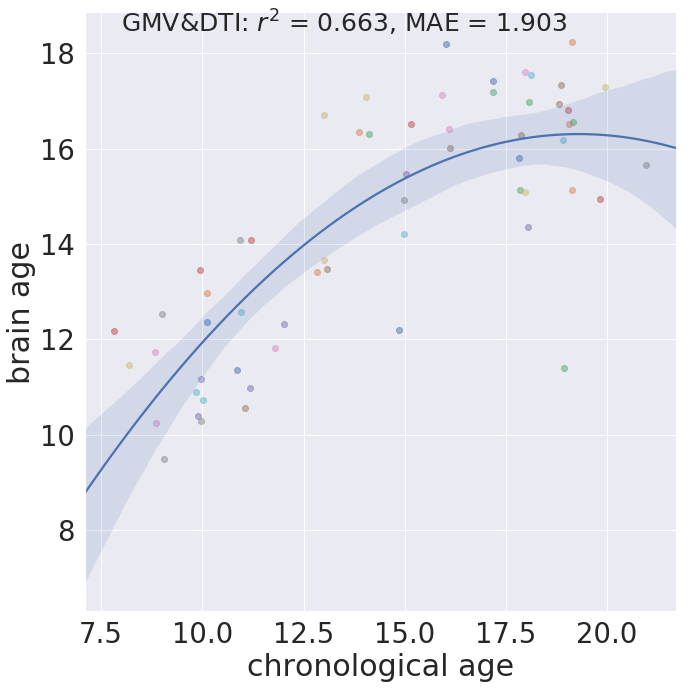

<Figure size 1080x1080 with 0 Axes>

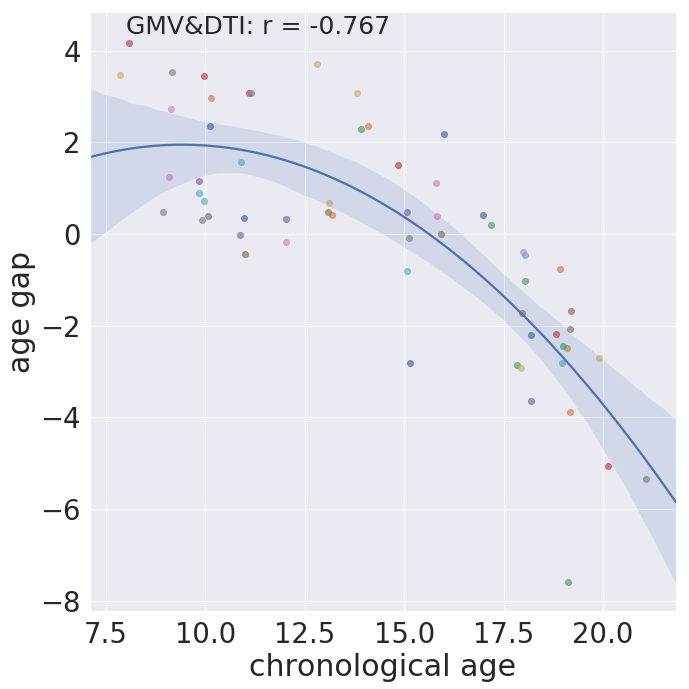

<Figure size 1080x1080 with 0 Axes>

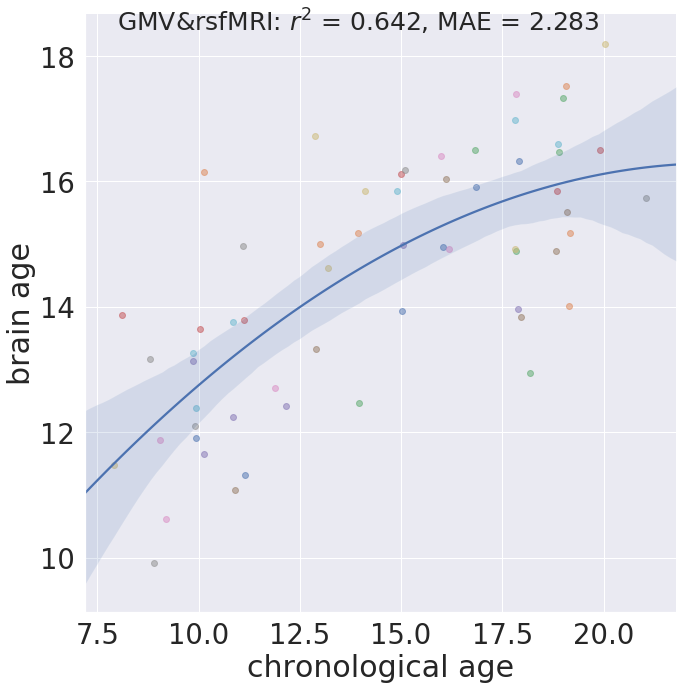

<Figure size 1080x1080 with 0 Axes>

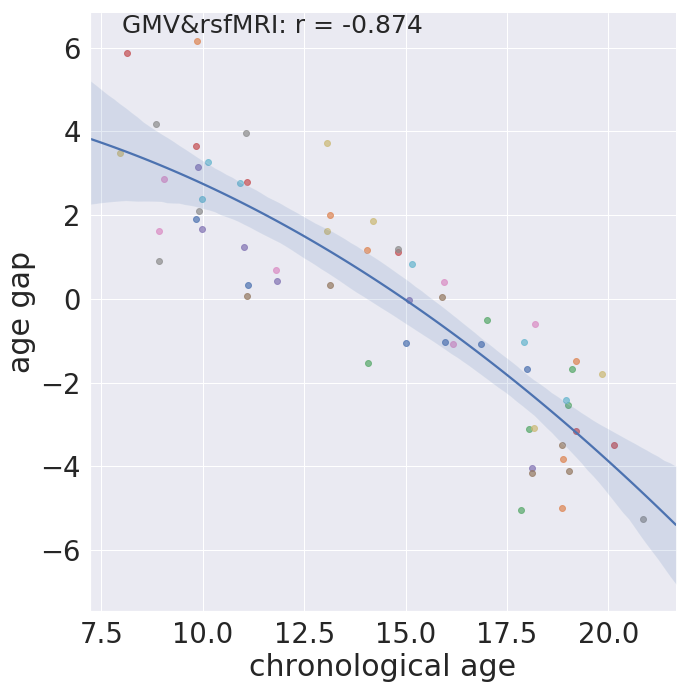

<Figure size 1080x1080 with 0 Axes>

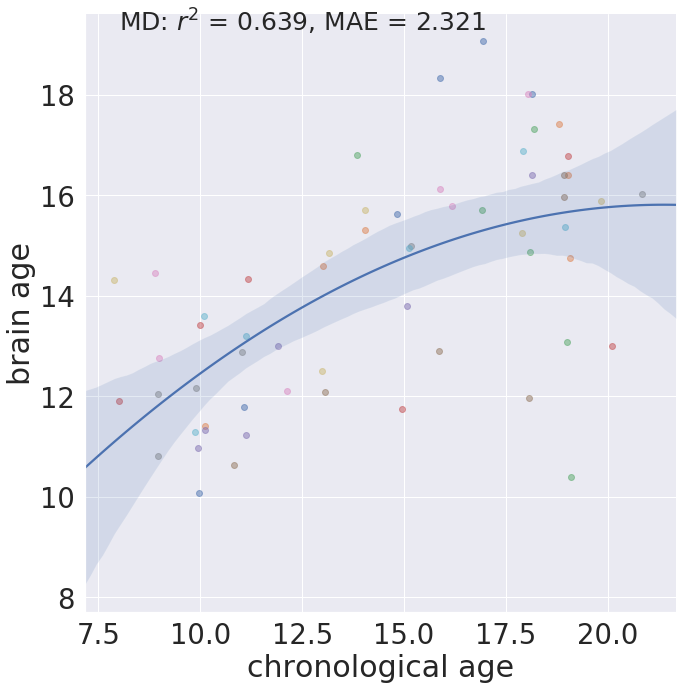

<Figure size 1080x1080 with 0 Axes>

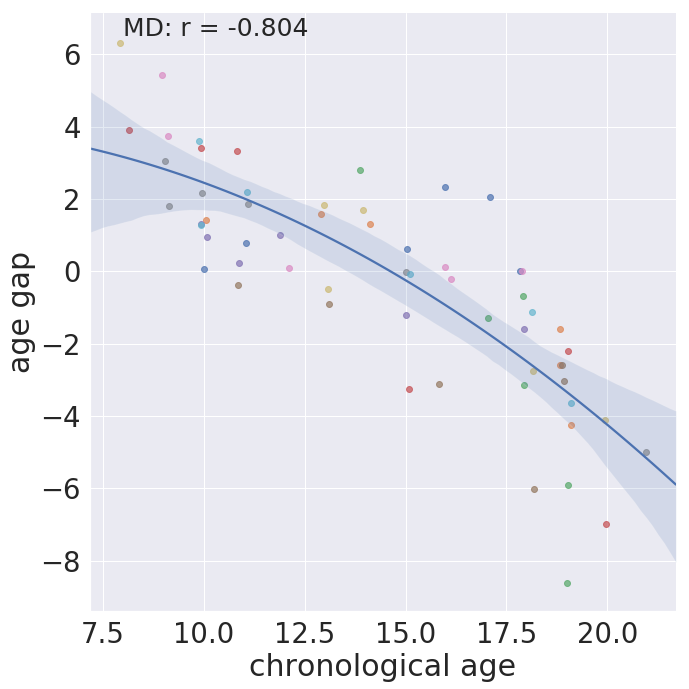

<Figure size 1080x1080 with 0 Axes>

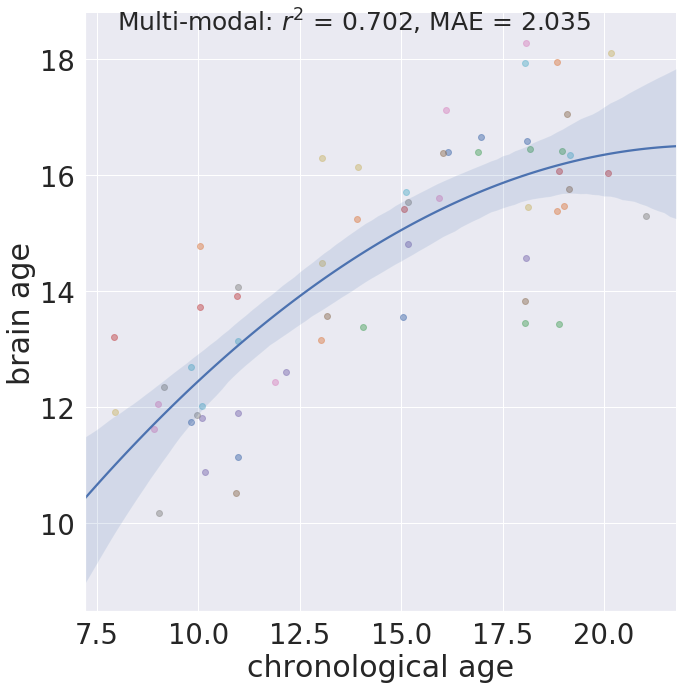

<Figure size 1080x1080 with 0 Axes>

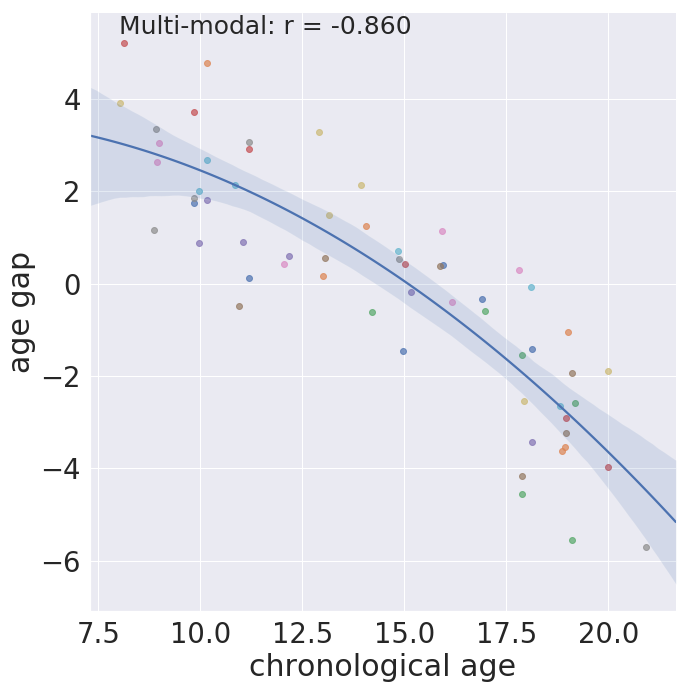

<Figure size 1080x1080 with 0 Axes>

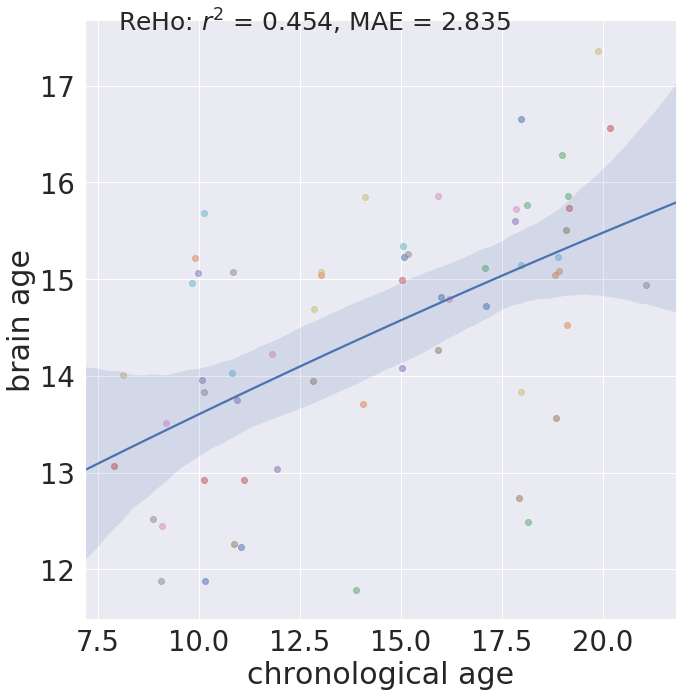

<Figure size 1080x1080 with 0 Axes>

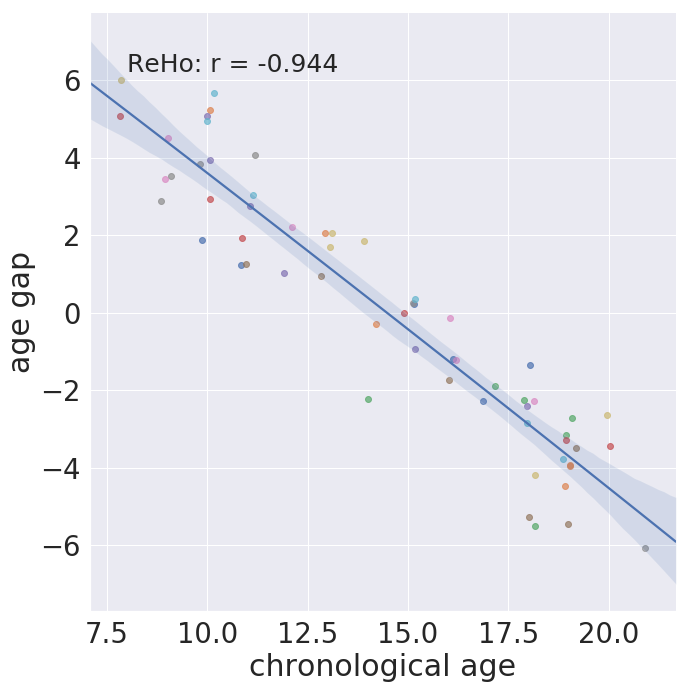

In [11]:
# plot svr regression results:

# to make the plot show up if codes are called in a function.
%matplotlib inline

scatter_data = pd.read_csv(result_dir + "scatter_data_svr.csv", sep = ",", header = 0, )
plot_result_mergecv(result_summary_svr, scatter_data)

In [12]:
############################################### GPR: #########################################
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel as CK

# gpr_kernel = 1.0 * RBF(length_scale=10, length_scale_bounds=(1e-2, 1e3)) \
#                     + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

# gpr_kernel2 = 1.0 * RBF(length_scale=100, length_scale_bounds=(1e-2, 1e3)) \
#                     + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

# gpr_kernel3 = 1.0 * RBF(length_scale=1000, length_scale_bounds=(1e-2, 1e3)) \
#                     + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

gpr_kernel4 = CK(2.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) \
                    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))


# gpr_kernel4 = 1.0 * RBF(length_scale=100, length_scale_bounds=(1e-2, 1e3))

gpr_alpha = np.power(10, np.linspace(-2, 2, num = 10))

#gpr_alpha = np.linspace(0,.1, num = 3)

#param_grid_gpr = dict(alpha = gpr_alpha, kernel=[gpr_kernel, gpr_kernel2, gpr_kernel3, gpr_kernel4])
param_grid_gpr = dict(alpha = gpr_alpha, kernel=[gpr_kernel4])

grid_gpr = GridSearchCV(estimator=GaussianProcessRegressor(), \
                                param_grid=param_grid_gpr, n_jobs=3, refit = True)

result_table_gpr, scatter_data_gpr = run_model(grid_gpr, subject_info_hc, brain_feature_list, kf, fit_method = 1)

processing on: %s -------------------------- GMV
run_model on CV: 1
Best: 0.580626 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: 0.594250 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3
Best: 0.590181 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: 0.629595 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.586462 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.564948 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: 0.642423 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.565532 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 9
Best: 0.641264 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 10
Best: 0.582195 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
processing on: %s -------------------------- ReHo
run_model on CV: 1
Best: 0.165914 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: 0.288364 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3
Best: 0.210450 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: 0.120870 using {'alpha': 0.027825594022071243, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5
Best: 0.053036 u

/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.306484 using {'alpha': 4.6415888336127775, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: 0.404556 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3
Best: 0.259165 using {'alpha': 4.6415888336127775, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: 0.389162 using {'alpha': 4.6415888336127775, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.291277 using {'alpha': 4.6415888336127775, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6
Best: 0.265573 using {'alpha': 4.6415888336127775, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: 0.231786 using {'alpha': 4.6415888336127775, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.297244 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 9
Best: 0.362004 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 10
Best: 0.457336 using {'alpha': 4.6415888336127775, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
processing on: %s -------------------------- FA
run_model on CV: 1


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.227678 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: 0.201532 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3
Best: 0.240542 using {'alpha': 12.915496650148826, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: 0.333108 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5
Best: 0.205451 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.120814 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: 0.192192 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8
Best: 0.231178 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 9
Best: 0.309431 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.361315 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
processing on: %s -------------------------- MD
run_model on CV: 1


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.365551 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: 0.357161 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3
Best: 0.383544 using {'alpha': 12.915496650148826, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: 0.482956 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5
Best: 0.334121 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6
Best: 0.319482 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: 0.367790 using {'alpha': 0.0774263682681127, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8
Best: 0.406357 using {'alph

/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.684455 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5
Best: 0.591028 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6
Best: 0.590051 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: 0.618499 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8
Best: 0.668693 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 9
Best: 0.677783 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.656343 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
processing on: %s -------------------------- GMV&rsfMRI
run_model on CV: 1
Best: 0.528533 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: 0.640663 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3
Best: 0.499354 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: 0.613641 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5
Best: 0.515409 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.499055 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: 0.519102 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8
Best: 0.546016 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 9
Best: 0.561568 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 10


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.582014 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
processing on: %s -------------------------- DTI&rsfMRI
run_model on CV: 1
Best: 0.509113 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: 0.543737 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.498103 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: 0.562235 using {'alpha': 0.21544346900318834, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.461385 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6
Best: 0.440977 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: 0.468676 using {'alpha': 1.6681005372000592, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8
Best: 0.499567 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 9
Best: 0.524614 using {'alpha': 0.027825594022071243, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 10
Best: 0.563127 using {'alpha': 0.5994842503189409, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
processing on: %s -------------------------- Multi-modal
run_model on CV: 1
Best: 0.614226 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}


/home/xin/environments/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best: 0.663295 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}


In [13]:
result_table_gpr.to_csv(result_dir + "result_table_gpr.csv", sep = ",")
scatter_data_gpr.to_csv(result_dir + "scatter_data_gpr.csv", sep = ",", index = False)

In [14]:
import pandas as pd

result_table = pd.read_csv(result_dir + "result_table_gpr.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_gpr, result_plot_gpr = summary_result(result_table)

#print(plot_data)

summary_result:
            Pearson r            R square                 MAE            \
                 mean       std      mean       std      mean       std   
GMV          0.755640  0.167536  0.596253  0.241385  1.892420  0.678316   
ReHo         0.721519  0.142417  0.538844  0.207584  2.284739  0.715462   
ALFF         0.588956  0.331638  0.445855  0.301435  2.516224  0.947670   
FA           0.501740  0.328075  0.348614  0.297133  2.942690  1.002099   
MD           0.632546  0.438513  0.573179  0.280973  2.357281  0.972023   
GMV&DTI      0.769338  0.296356  0.670926  0.290877  1.776147  0.777143   
GMV&rsfMRI   0.753261  0.195114  0.601665  0.274416  2.090509  0.858962   
DTI&rsfMRI   0.809884  0.123013  0.669531  0.178637  2.034564  0.813173   
Multi-modal  0.833269  0.156606  0.716409  0.225258  1.901901  0.505073   

                 rmse            
                 mean       std  
GMV          2.224034  0.730226  
ReHo         2.758265  0.883464  
ALFF         3.028950 

<Figure size 1080x1080 with 0 Axes>

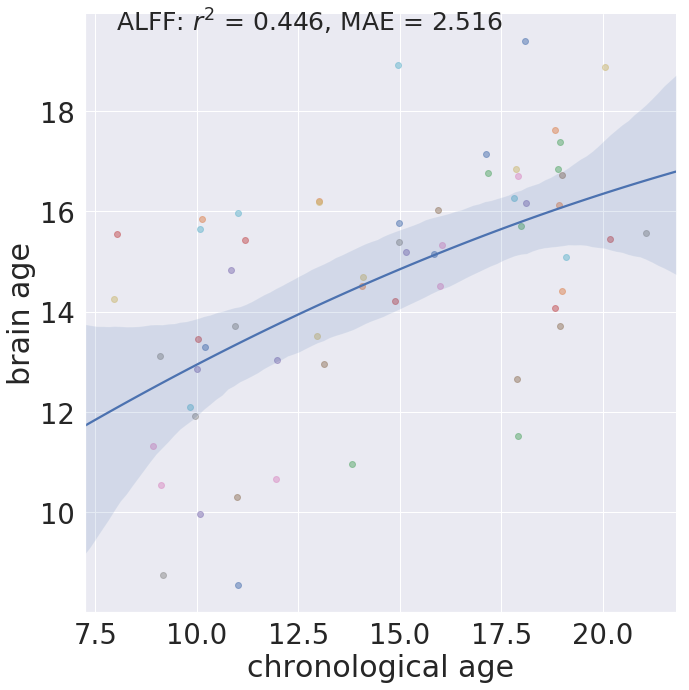

<Figure size 1080x1080 with 0 Axes>

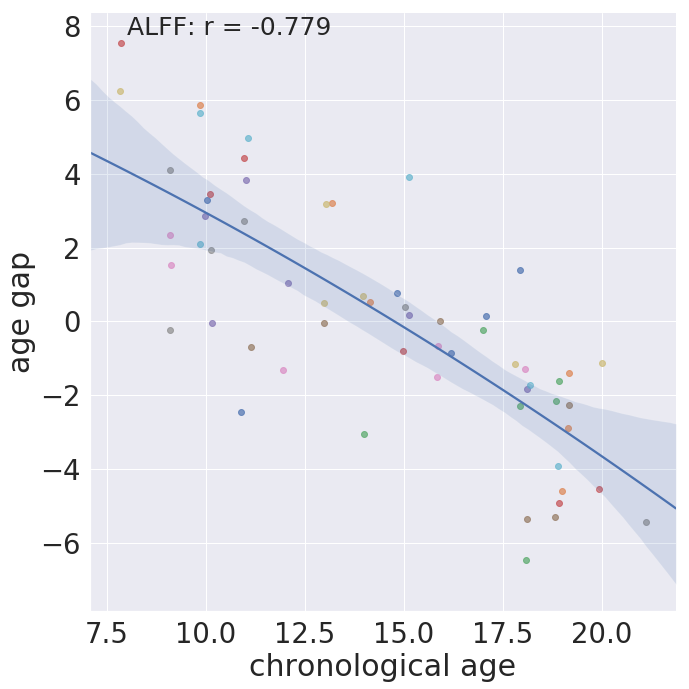

<Figure size 1080x1080 with 0 Axes>

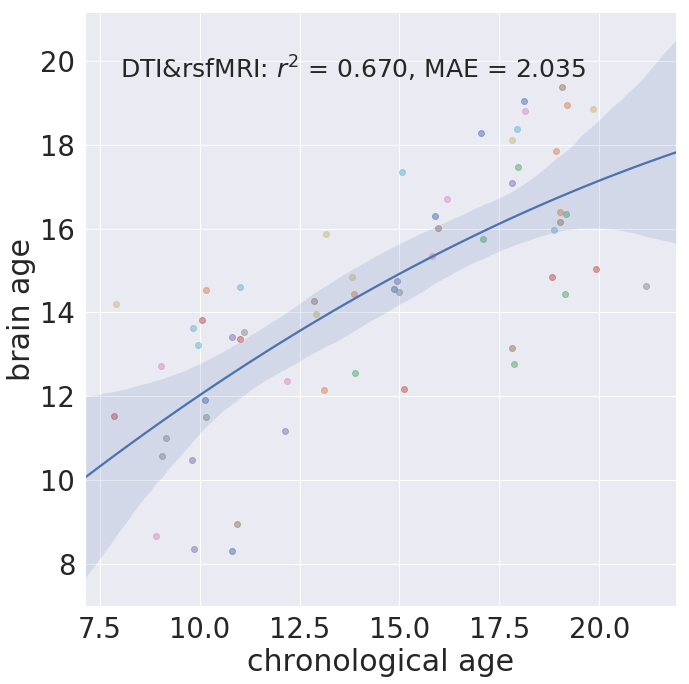

<Figure size 1080x1080 with 0 Axes>

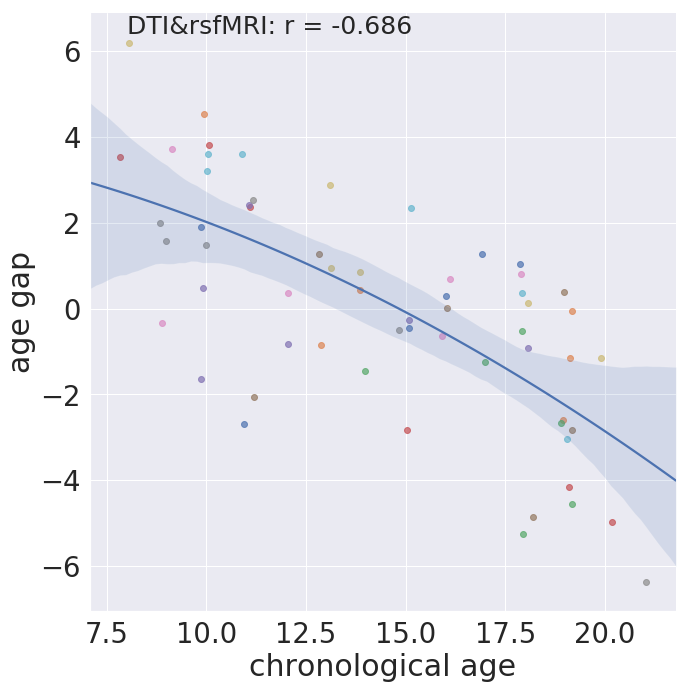

<Figure size 1080x1080 with 0 Axes>

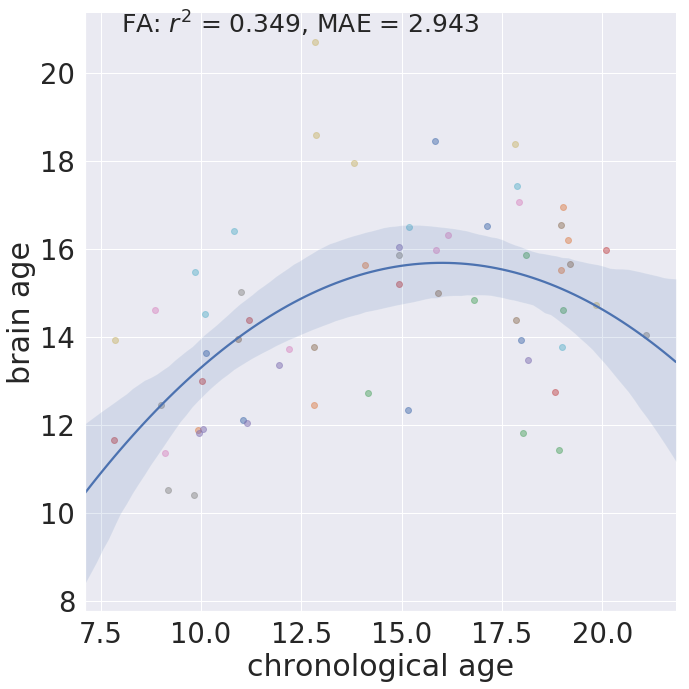

<Figure size 1080x1080 with 0 Axes>

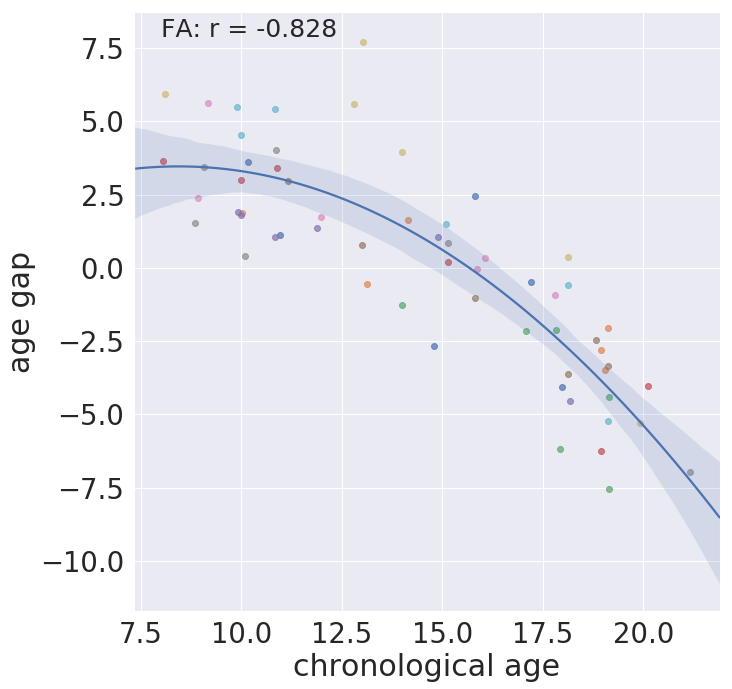

<Figure size 1080x1080 with 0 Axes>

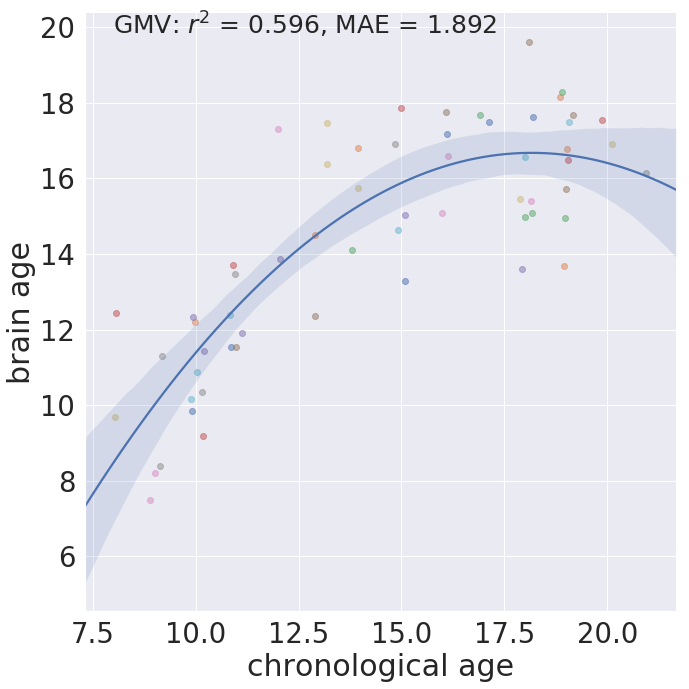

<Figure size 1080x1080 with 0 Axes>

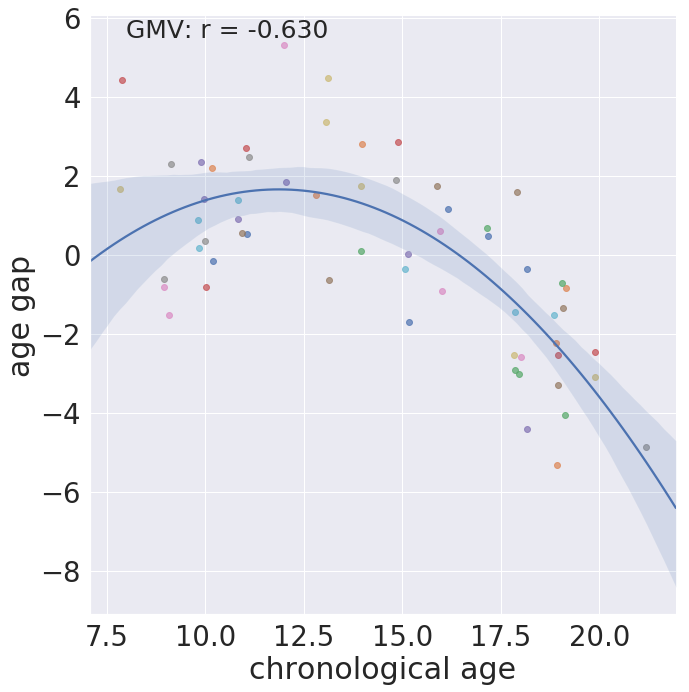

<Figure size 1080x1080 with 0 Axes>

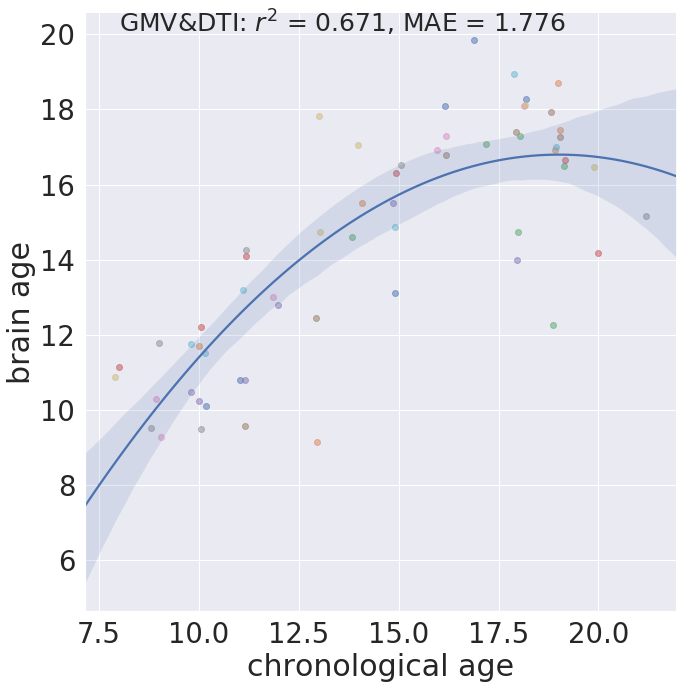

<Figure size 1080x1080 with 0 Axes>

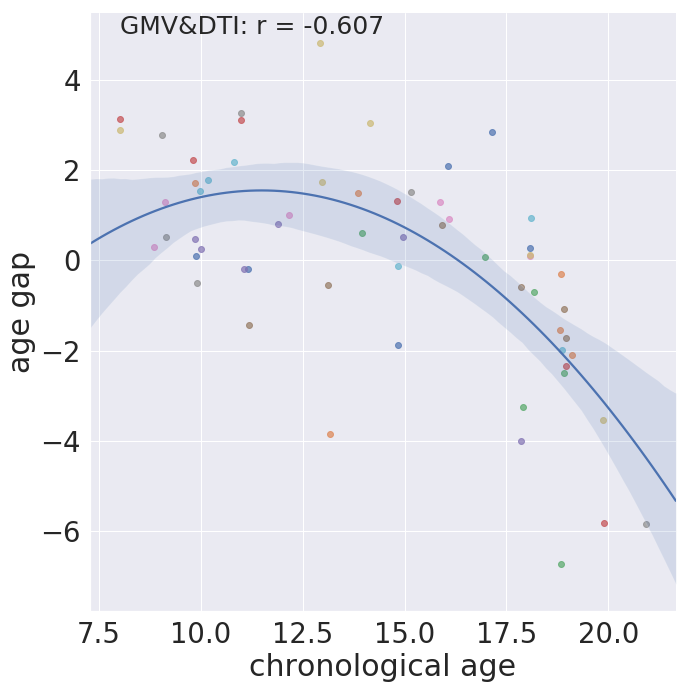

<Figure size 1080x1080 with 0 Axes>

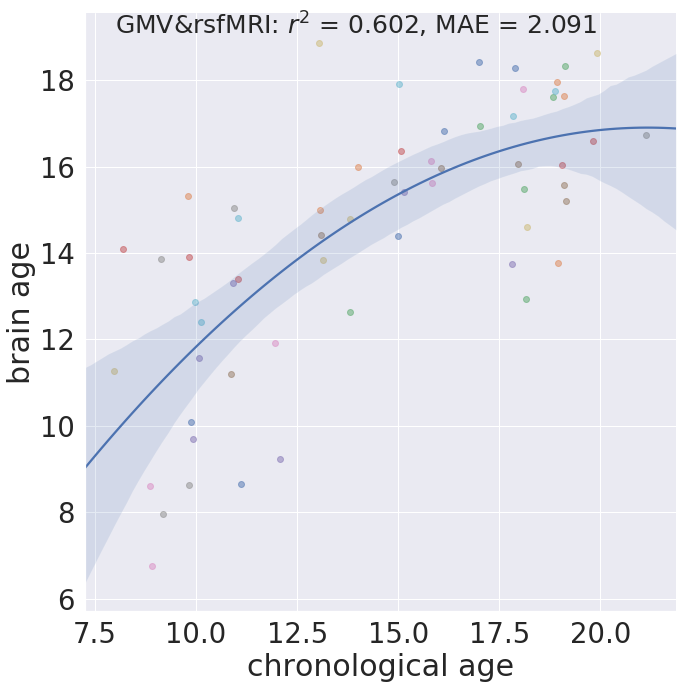

<Figure size 1080x1080 with 0 Axes>

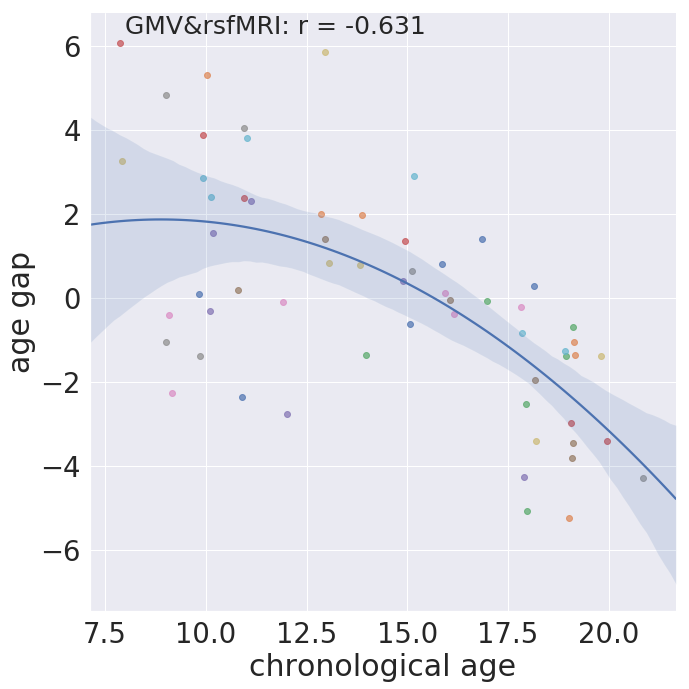

<Figure size 1080x1080 with 0 Axes>

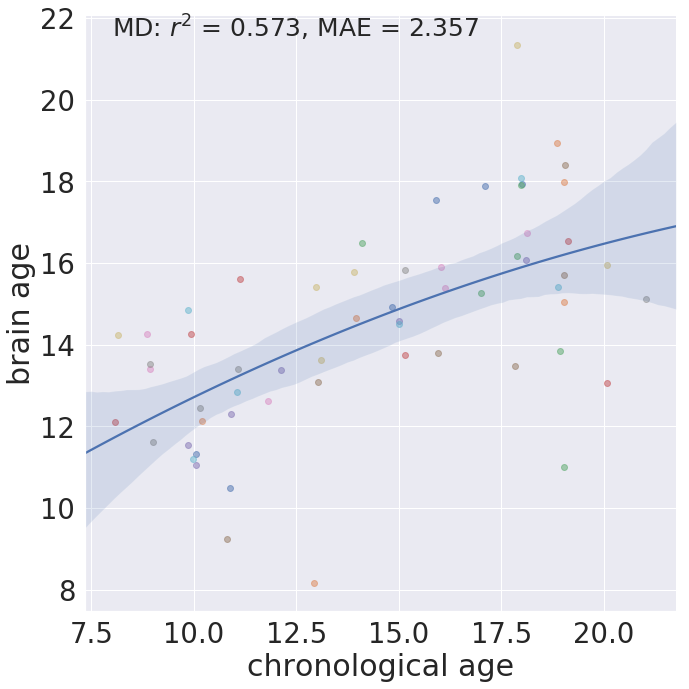

<Figure size 1080x1080 with 0 Axes>

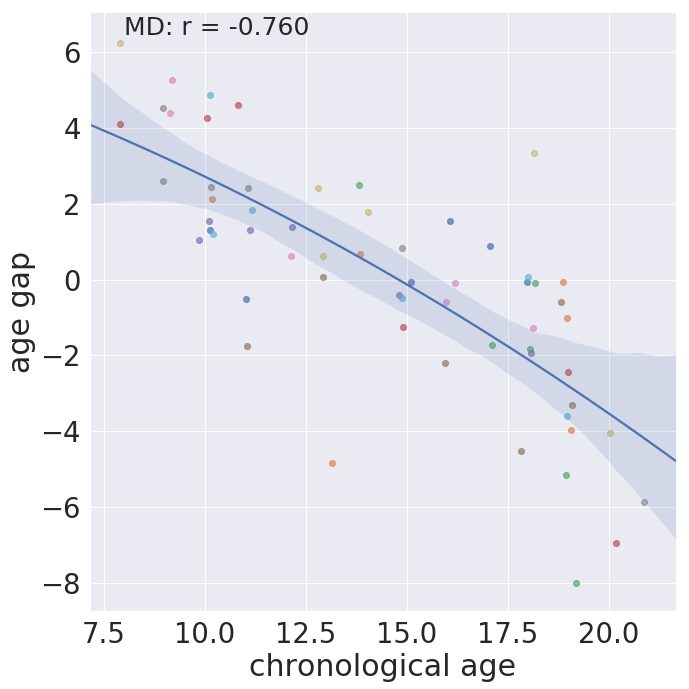

<Figure size 1080x1080 with 0 Axes>

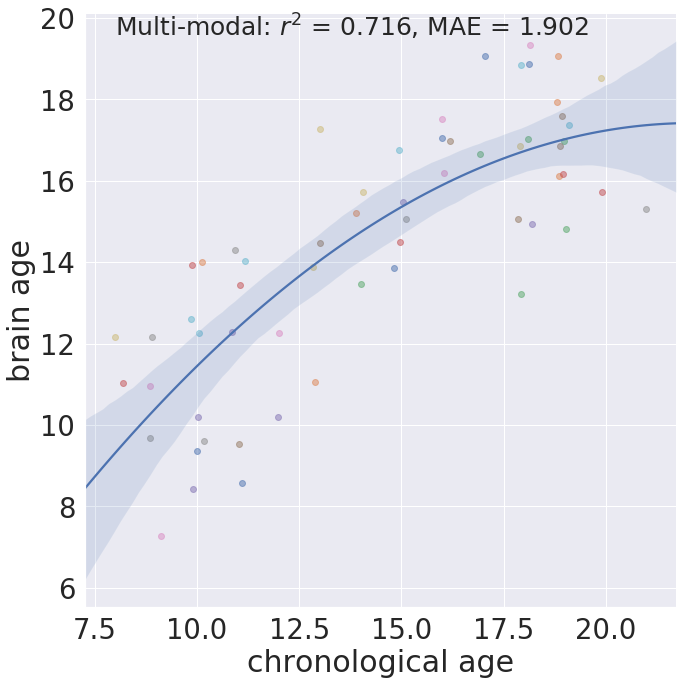

<Figure size 1080x1080 with 0 Axes>

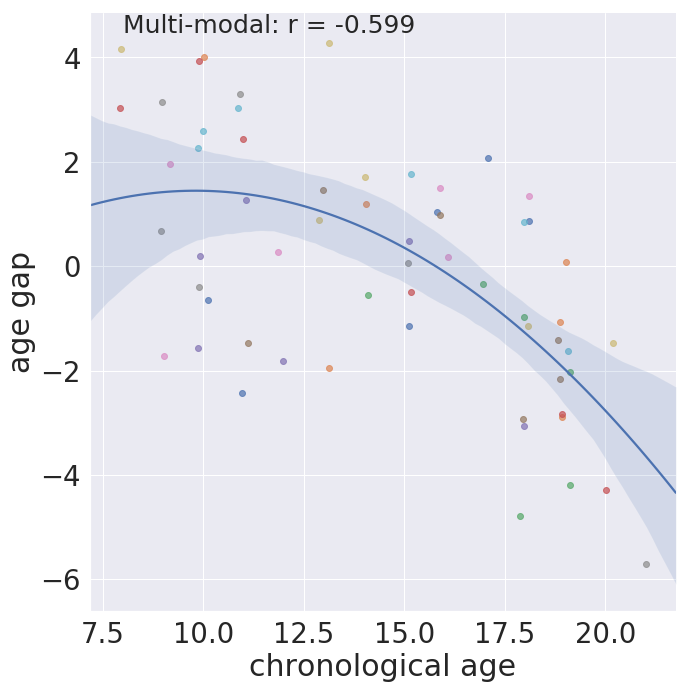

<Figure size 1080x1080 with 0 Axes>

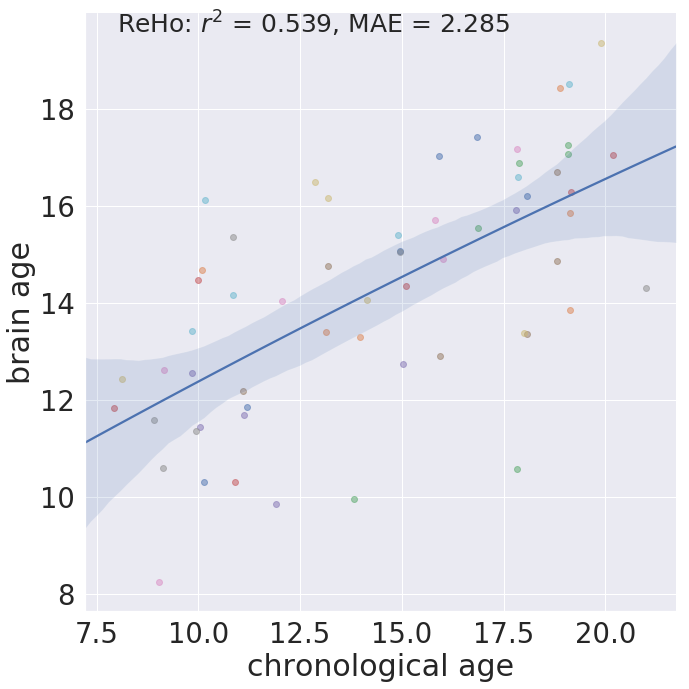

<Figure size 1080x1080 with 0 Axes>

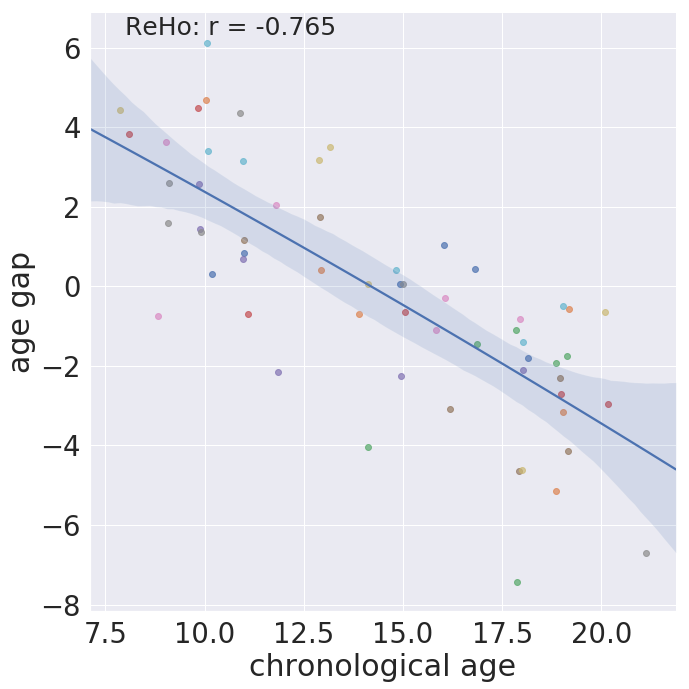

In [15]:
# plot gpr regression results:
from my_fun import plot_result_mergecv

# to make the plot show up if codes are called in a function.
%matplotlib inline

scatter_data = pd.read_csv(result_dir + "scatter_data_gpr.csv", sep = ",", header = 0, )
plot_result_mergecv(result_summary_gpr, scatter_data)
        